In [1]:
import os
import argparse
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.autograd import Function
from torchvision import models

from NNUtils import CustomDataset
import glob
import tifffile as tiff

import errno
import imageio

from PIL import Image
from torch.utils import data
import torch.nn.functional as F
import torch.nn as nn

from NNLoss import dice_loss

from skimage import io

from skimage import transform as tf

In [2]:
index = 50
# index = 80

device = torch.device('cuda')

test_data = '/home/moucheng/projects_data/Pulmonary_data/CARVE2014/cross_validation/dense_2_r176_s5/test'
test_data_images = test_data + '/patches'
test_data_labels = test_data + '/labels'
dataset = CustomDataset(test_data_images, test_data_labels, 'none', 3)

images1, images2, images3, labels, imagename = dataset[index]

img = images2.squeeze()
lbl = labels.squeeze()

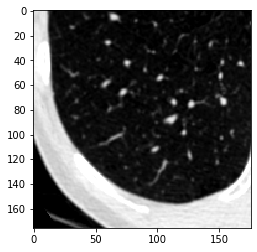

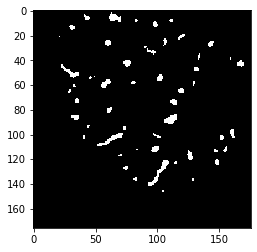

In [3]:
plt.imshow(img, cmap='gray')
plt.show()

plt.imshow(lbl, cmap='gray')
plt.show()

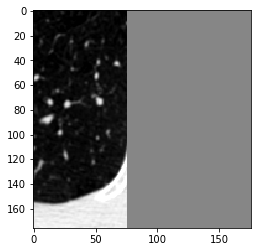

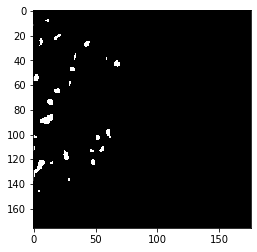

In [4]:
afine_tf1 = tf.AffineTransform(scale=(1.0, 1.0), rotation=0.0, shear=0.0,
                        translation=(100, 0))
img_aug1 = tf.warp(img.copy(), inverse_map=afine_tf1)
plt.imshow(img_aug1, cmap='gray')
plt.show()

lbl_aug1 = tf.warp(lbl.copy(), inverse_map=afine_tf1)
plt.imshow(lbl_aug1, cmap='gray')
plt.show()

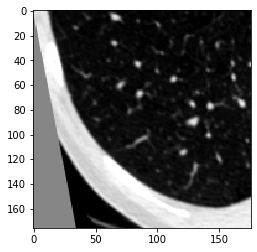

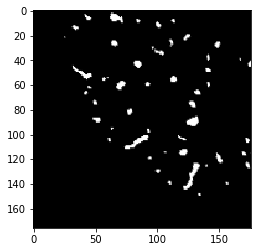

In [5]:
afine_tf2 = tf.AffineTransform(scale=(1.0, 1.0), rotation=0.0, shear=0.2,
                        translation=(0, 0))
img_aug2 = tf.warp(img.copy(), inverse_map=afine_tf2)
plt.imshow(img_aug2, cmap='gray')
plt.show()

lbl_aug2 = tf.warp(lbl.copy(), inverse_map=afine_tf2)
plt.imshow(lbl_aug2, cmap='gray')
plt.show()

In [6]:
save_folder = '/home/moucheng/PhD/MICCAI 2021/images'

save_name1 = save_folder + '/' + 'dense_2_s5_' + str(index) + '_img.png'
plt.imsave(save_name1, img, cmap="gray")

save_name2 = save_folder + '/' + 'dense_2_s5_' + str(index) + '_lbl.png'
plt.imsave(save_name2, lbl, cmap="gray")

save_name3 = save_folder + '/' + 'dense_2_s5_' + str(index) + '_img_aug1.png'
plt.imsave(save_name3, img_aug1, cmap="gray")

save_name4 = save_folder + '/' + 'dense_2_s5_' + str(index) + '_img_aug2.png'
plt.imsave(save_name4, img_aug2, cmap="gray")

save_name5 = save_folder + '/' + 'dense_2_s5_' + str(index) + '_img_aug1.png'
plt.imsave(save_name3, img_aug1, cmap="gray")

save_name6 = save_folder + '/' + 'dense_2_s5_' + str(index) + '_img_aug2.png'
plt.imsave(save_name4, img_aug2, cmap="gray")